# PyCaret

前処理，ハイパーパラメータのチューニング，推論を自動実行できるモジュール

## データセットの読み込み(ボストン住宅価格)

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split

boston = load_boston()
df_x_boston = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df_y_boston = pd.DataFrame(boston['target'], columns=['MEDV'])
df_boston = pd.concat([df_x_boston, df_y_boston], axis=1)

x_train, x_test, y_train, y_test = train_test_split(df_x_boston, df_y_boston, test_size=0.2, random_state=1)

df_train = pd.concat([x_train, y_train], axis=1)
df_test = pd.concat([x_test, y_test], axis=1)

## PyCaret動作確認

In [2]:
from pycaret.regression import *
import shap
reg1 = setup(data=df_train, target='MEDV')

,Description,Value
0,session_id,8011
1,Target,MEDV
2,Original Data,"(404, 14)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(282, 13)"


In [3]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.2103,9.6212,3.0293,0.8607,0.1370,0.1116,0.0120
et,Extra Trees Regressor,2.2953,12.1446,3.3795,0.8381,0.1432,0.1133,0.0970
rf,Random Forest Regressor,2.4399,13.0637,3.5261,0.8219,0.1465,0.1177,0.1000
lightgbm,Light Gradient Boosting Machine,2.5344,13.4369,3.5947,0.8212,0.1464,0.1206,0.0110
ada,AdaBoost Regressor,2.7859,14.4454,3.7282,0.7956,0.1748,0.1490,0.0150
dt,Decision Tree Regressor,2.9995,18.9226,4.2879,0.7216,0.2014,0.1535,0.0080
lr,Linear Regression,3.3764,24.5918,4.8252,0.6849,0.2350,0.1716,0.1840
ridge,Ridge Regression,3.3712,24.9626,4.8652,0.6808,0.2449,0.1731,0.0080
br,Bayesian Ridge,3.4847,26.0307,4.9911,0.6635,0.2534,0.1780,0.0090
en,Elastic Net,3.6318,27.8193,5.1632,0.6391,0.2609,0.1818,0.0060


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=8011, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [4]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.9678,5.0152,2.2395,0.9384,0.1118,0.0950
1,2.1298,12.7393,3.5692,0.8044,0.1281,0.0911
2,2.3529,11.3538,3.3695,0.8360,0.1446,0.1058
3,2.8813,17.9129,4.2324,0.8367,0.1499,0.1285
4,2.3285,18.3588,4.2847,0.8290,0.1540,0.1070
5,2.3323,9.9347,3.1519,0.8361,0.1518,0.1233
6,1.5904,3.8515,1.9625,0.9424,0.0990,0.0859
7,2.1208,8.9869,2.9978,0.7792,0.1571,0.1357
8,2.3294,9.9738,3.1581,0.8104,0.1496,0.1194
9,2.9203,23.3191,4.8290,0.7686,0.1861,0.1408


In [5]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.3468,7.0180,2.6491,0.9137,0.1203,0.1108
1,2.3689,12.2290,3.4970,0.8122,0.1431,0.1117
2,2.4972,12.4474,3.5281,0.8202,0.1522,0.1127
3,3.0805,26.4063,5.1387,0.7592,0.1726,0.1355
4,2.3883,23.6794,4.8662,0.7794,0.1609,0.1029
5,2.4306,9.5230,3.0859,0.8429,0.1460,0.1229
6,1.7529,4.7927,2.1892,0.9283,0.1192,0.1015
7,2.3252,11.4732,3.3872,0.7181,0.1934,0.1617
8,2.3139,10.0069,3.1634,0.8098,0.1496,0.1175
9,3.0689,25.2241,5.0224,0.7497,0.1942,0.1509


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


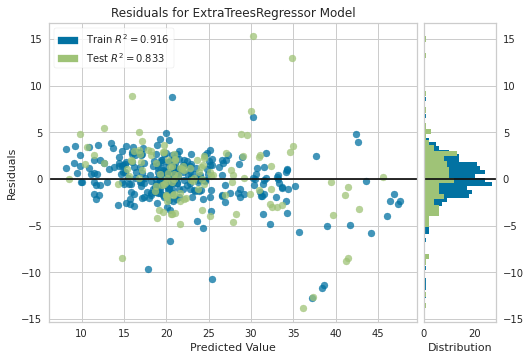

In [6]:
plot_model(tuned_et)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


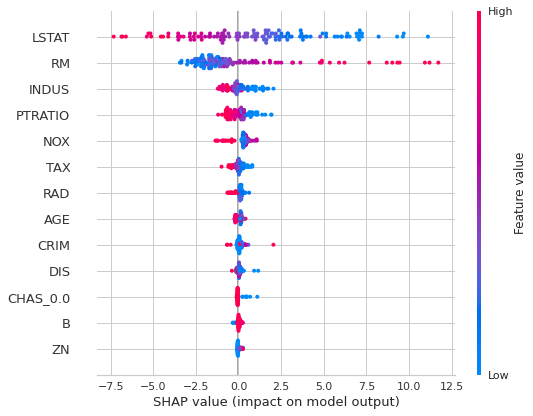

In [7]:
interpret_model(tuned_et)

In [8]:
predictions = predict_model(tuned_et, data=df_test)
predictions

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Label
307,0.04932,33.0,2.18,0.0,0.472,6.849,70.3,3.1827,7.0,222.0,18.4,396.90,7.53,28.2,28.480659
343,0.02543,55.0,3.78,0.0,0.484,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18,23.9,27.006535
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80,16.6,19.519398
67,0.05789,12.5,6.07,0.0,0.409,5.878,21.4,6.4980,4.0,345.0,18.9,396.21,8.10,22.0,20.948507
362,3.67822,0.0,18.10,0.0,0.770,5.362,96.2,2.1036,24.0,666.0,20.2,380.79,10.19,20.8,23.031524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,270.0,18.2,395.01,8.16,22.9,24.302520
224,0.31533,0.0,6.20,0.0,0.504,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14,44.8,42.908687
110,0.10793,0.0,8.56,0.0,0.520,6.195,54.4,2.7778,5.0,384.0,20.9,393.49,13.00,21.7,20.569285
426,12.24720,0.0,18.10,0.0,0.584,5.837,59.7,1.9976,24.0,666.0,20.2,24.65,15.69,10.2,17.408972


In [9]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

r2 = r2_score(predictions['MEDV'], predictions['Label'])
mae = mean_absolute_error(predictions['MEDV'], predictions['Label'])

print("R2 : %.3f" % r2)
print("MAE : %.3f" % mae)

R2 : 0.872
MAE : 2.627
